In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('training_set.csv')
df_test = pd.read_csv('test_set.csv')

In [4]:
df.head()

,Impurity.Percent,Impurity.Type,I,II,III,IV,V,Temp
0,2.69,A,103.9,14.4,9.5,5.0,49.9,31.42
1,3.15,A,105.5,14.6,9.7,5.0,50.1,33.51
2,3.24,A,106.1,14.6,9.7,5.0,50.0,35.45
3,3.32,A,108.5,14.6,9.6,4.9,50.1,32.60
4,3.56,A,107.1,14.4,9.3,5.0,48.6,30.53


In [5]:
df.describe()

,Impurity.Percent,I,II,III,IV,V,Temp
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,4.031739,99.809783,16.407609,13.075000,10.204348,54.901087,31.118696
std,1.776082,2.695257,3.368511,11.277281,7.157305,6.555335,2.723605
min,1.860000,95.900000,12.800000,8.800000,4.900000,47.000000,23.620000
25%,2.697500,98.500000,14.475000,9.575000,5.700000,49.000000,29.052500
50%,3.460000,99.300000,14.800000,9.800000,7.450000,53.650000,31.655000
75%,4.995000,100.100000,17.325000,10.300000,10.175000,59.600000,33.147500
max,7.940000,110.300000,29.100000,67.500000,34.700000,75.600000,35.530000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Impurity.Percent  92 non-null     float64
 1   Impurity.Type     92 non-null     object 
 2   I                 92 non-null     float64
 3   II                92 non-null     float64
 4   III               92 non-null     float64
 5   IV                92 non-null     float64
 6   V                 92 non-null     float64
 7   Temp              92 non-null     float64
dtypes: float64(7), object(1)
memory usage: 5.9+ KB


In [7]:
df.skew()

Impurity.Percent    0.920188
I                   2.258976
II                  1.792349
III                 3.531829
IV                  1.918239
V                   0.801142
Temp               -0.488842
dtype: float64

In [8]:
df_test.skew()

I       0.491331
II      1.675308
III     4.209747
IV      1.885081
V       0.790322
Temp   -0.424792
dtype: float64

<AxesSubplot:>

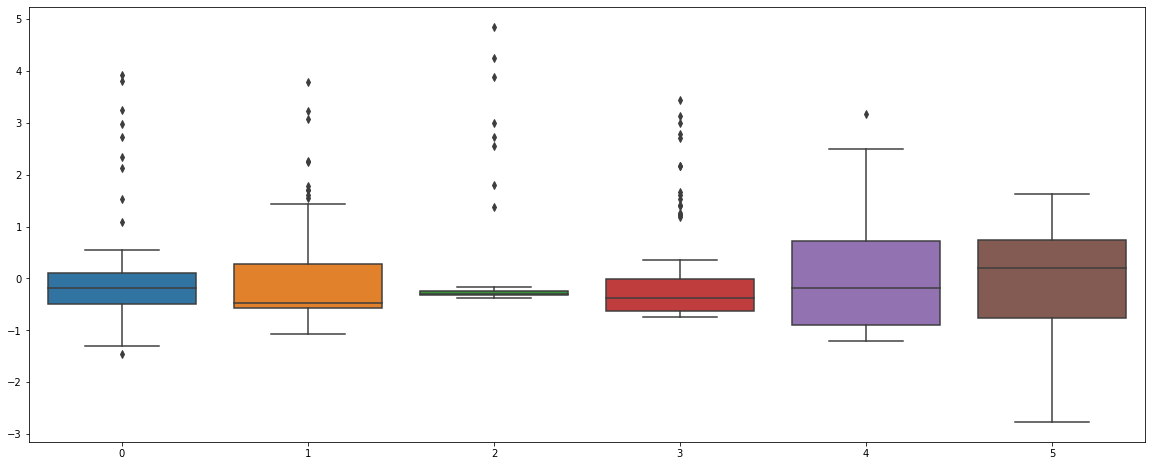

In [9]:
df_norm = df[['I','II','III','IV','V','Temp']]
from sklearn.preprocessing import StandardScaler
slr = StandardScaler()
df_norm1 = slr.fit_transform(df_norm)
df_norm2 = pd.DataFrame(df_norm1)
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=df_norm2,ax=ax) 

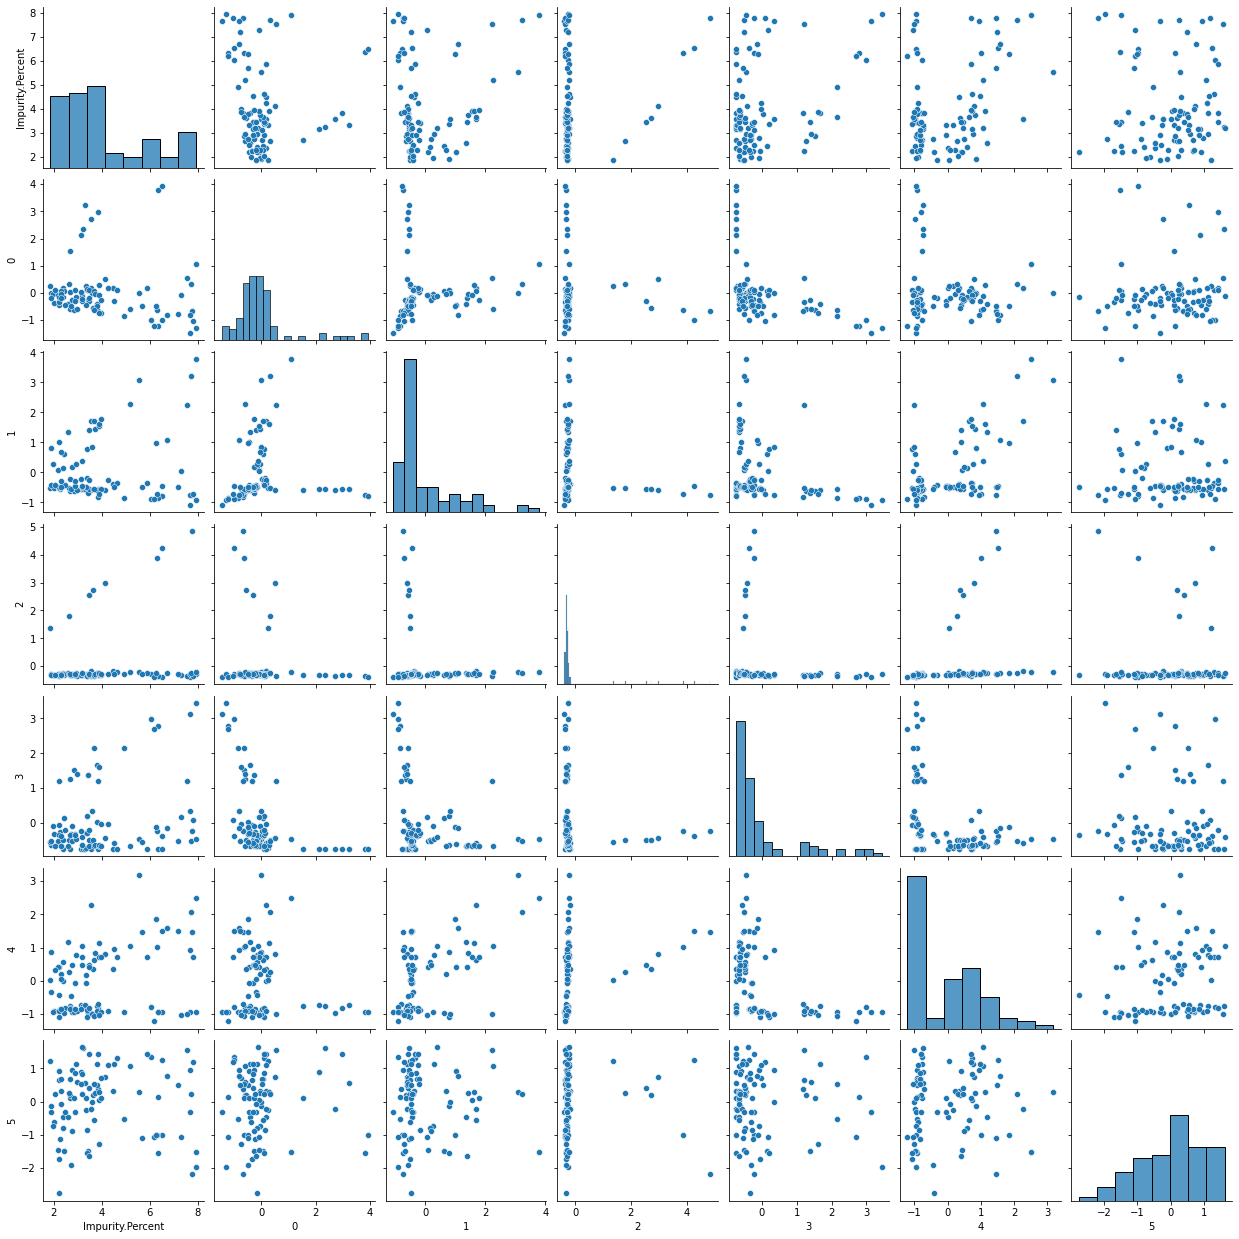

In [10]:
df_final =pd.concat([df[['Impurity.Percent','Impurity.Type']],df_norm2],axis=1)
sns.pairplot(df_final)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(df_final.drop(['Impurity.Type','Impurity.Percent'],axis= 'columns'))
print(pca.explained_variance_ratio_)
pca_transform = pca.transform(df_final.drop(['Impurity.Type','Impurity.Percent'],axis= 'columns'))

[0.32574423 0.22292639 0.18355953 0.1650224  0.06633242]


In [12]:
df_final_1= pd.concat([df[['Impurity.Percent','Impurity.Type']],pd.DataFrame(pca_transform)],axis=1)

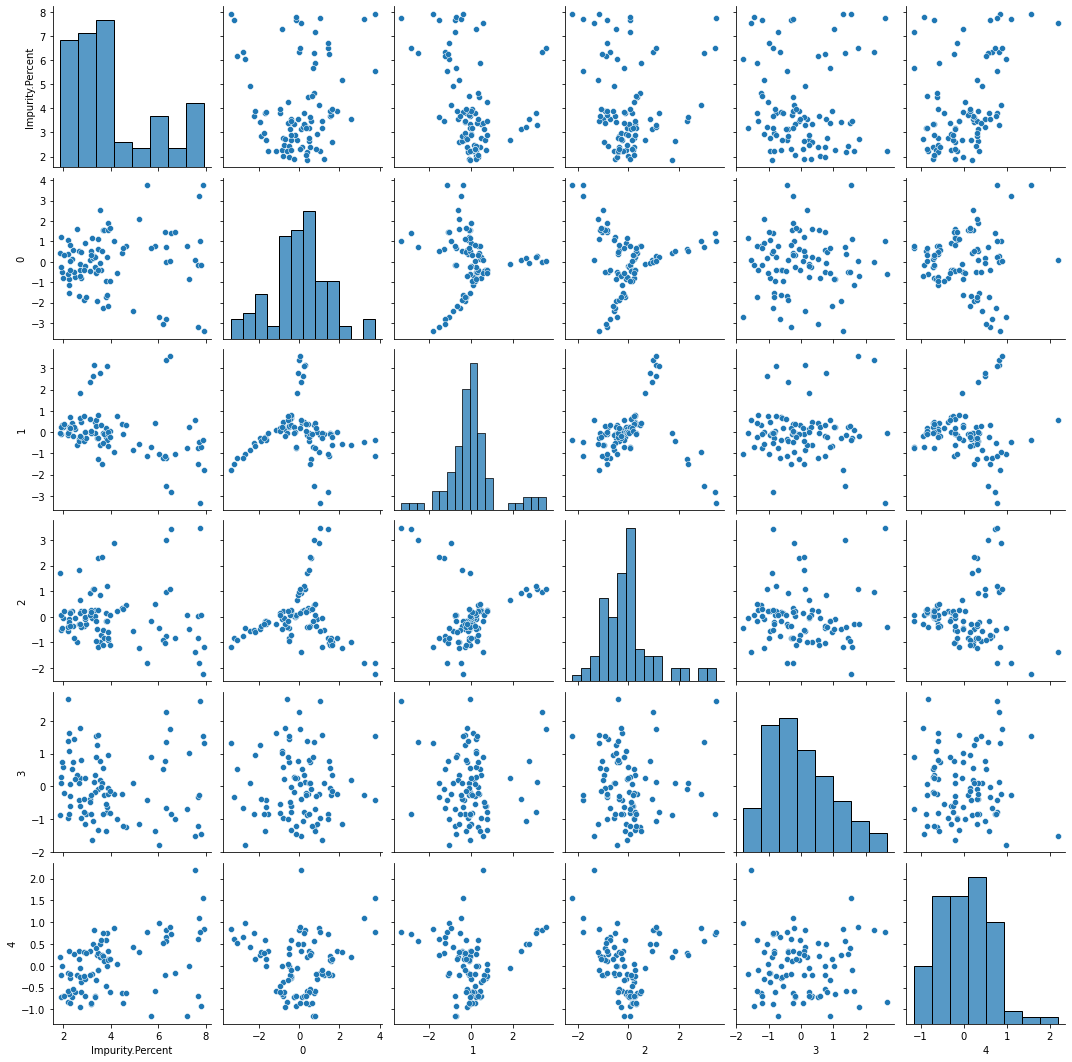

In [13]:
sns.pairplot(df_final_1)

In [14]:
df_final.head()

,Impurity.Percent,Impurity.Type,0,1,2,3,4,5
0,2.69,A,1.525877,-0.599259,-0.318746,-0.731122,-0.767084,0.111233
1,3.15,A,2.122765,-0.539560,-0.300914,-0.731122,-0.736407,0.882803
2,3.24,A,2.346598,-0.539560,-0.300914,-0.731122,-0.751745,1.598997
3,3.32,A,3.241931,-0.539560,-0.309830,-0.745171,-0.736407,0.546856
4,3.56,A,2.719653,-0.599259,-0.336578,-0.731122,-0.966482,-0.217330


In [15]:
y = df['Impurity.Percent']
X = df.drop(['Impurity.Type','Impurity.Percent'],axis= 'columns')


In [16]:
df_corr = df.drop(['Impurity.Type'],axis='columns')
corr= df_corr.corr()
corr.style.background_gradient(cmap='coolwarm')

,Impurity.Percent,I,II,III,IV,V,Temp
Impurity.Percent,1.000000,-0.084153,0.140648,0.193323,0.313394,0.302636,-0.011866
I,-0.084153,1.000000,0.037889,-0.118291,-0.454783,-0.140185,0.045296
II,0.140648,0.037889,1.000000,-0.155436,-0.297450,0.579137,-0.015106
III,0.193323,-0.118291,-0.155436,1.000000,-0.124058,0.291800,-0.024498
IV,0.313394,-0.454783,-0.297450,-0.124058,1.000000,-0.447161,-0.078916
V,0.302636,-0.140185,0.579137,0.291800,-0.447161,1.000000,0.068575
Temp,-0.011866,0.045296,-0.015106,-0.024498,-0.078916,0.068575,1.000000


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=555)

In [18]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(X, y)

selected_feat= X.columns[(sel.get_support())]
print(len(selected_feat))

selected_feat

3


Index(['I', 'II', 'V'], dtype='object')

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
from sklearn.model_selection import cross_val_score
lr=cross_val_score(reg,X,y,cv=10,scoring='neg_mean_squared_error')
print('CV MSE: %.3f +/- %.3f' % (-np.mean(lr), np.std(lr)))

CV MSE: 4.835 +/- 4.679


In [20]:
from sklearn import linear_model
lasso_model = linear_model.Lasso(alpha=0.1)
lasso_model.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score
lasso_cv=cross_val_score(lasso_model,X,y,cv=10,scoring='neg_mean_squared_error')
# calculate the linear MSE mean and std
print('CV MSE: %.3f +/- %.3f' % (-np.mean(lasso_cv), np.std(lasso_cv)))

CV MSE: 3.770 +/- 3.123


In [21]:
from sklearn.linear_model import ElasticNet
regr_en = ElasticNet(random_state=0)
regr_en.fit(X, y)
en=cross_val_score(regr_en,X,y,cv=10,scoring='neg_mean_squared_error')
# calculate the linear MSE mean and std
print('CV MSE: %.3f +/- %.3f' % (-np.mean(en), np.std(en)))

CV MSE: 2.905 +/- 1.232


In [22]:
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge(alpha=1.0)
krr.fit(X, y)
krreg=cross_val_score(krr,X,y,cv=10,scoring='neg_mean_squared_error')
# calculate the linear MSE mean and std
print('CV MSE: %.3f +/- %.3f' % (-np.mean(krreg), np.std(krreg)))

CV MSE: 4.718 +/- 4.351


In [23]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(loss= 'squared_error',random_state=5555,learning_rate=0.1,n_estimators=100,criterion='friedman_mse')
reg.fit(X_train, y_train)
gbr=cross_val_score(reg,X,y,cv=10,scoring='neg_mean_squared_error')
print('CV MSE: %.3f +/- %.3f' % (-np.mean(gbr), np.std(gbr)))

CV MSE: 2.143 +/- 0.996


In [24]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=12, random_state=5555)
regr.fit(X_train, y_train)
rfr=cross_val_score(regr,X,y,cv=10,scoring='neg_mean_squared_error')
print('CV MSE: %.3f +/- %.3f' % (-np.mean(rfr), np.std(rfr)))

CV MSE: 1.918 +/- 0.778


In [38]:
imp_df = pd.DataFrame({
    "Varname": X.columns,
    "Imp": regr.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
1,II,0.310502
0,I,0.262100
4,V,0.223639
5,Temp,0.079071
3,IV,0.078531
2,III,0.046157


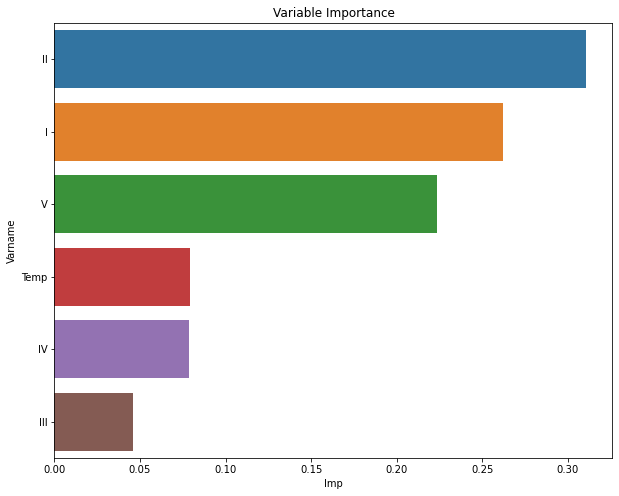

In [48]:
fig,ax=plt.subplots(1,figsize=(10,8))
sns.barplot(y='Varname',x='Imp',data = imp_df.sort_values(by="Imp", ascending=False),ax=ax)
plt.title("Variable Importance")
plt.savefig("Random Forest.png")


In [26]:

from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(df_test)
print(pca.explained_variance_ratio_)
pca_transform_test = pd.DataFrame(pca.transform(df_test))

[0.54460179 0.26905707 0.10660125 0.04795564 0.02632834]


In [ ]:
df_test['yhat'] = reg.predict(pca_transform_test)
df_test['yhat1'] = regr.predict(pca_transform_test)

In [ ]:
df_test.to_csv('regression.csv',index= False)

In [ ]:
from sklearn.svm import SVR
regr =SVR(C=1.0, epsilon=0.2)
regr.fit(X, y)
svr=cross_val_score(regr,X,y,cv=10,scoring='neg_mean_squared_error')
print('CV MSE: %.3f +/- %.3f' % (-np.mean(svr), np.std(svr)))

In [ ]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X, y)
rid=cross_val_score(clf,X,y,cv=10,scoring='neg_mean_squared_error')
print('CV MSE: %.3f +/- %.3f' % (-np.mean(rid), np.std(rid)))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(df_test)
print(pca.explained_variance_ratio_)
pca_transform = pd.DataFrame(pca.transform(df_test))

In [54]:
df_reg = df.drop(['Impurity.Type'],axis = 'columns')
df_reg.head()
df_reg.rename(columns={'Impurity.Percent': 'Y'}, inplace=True)

In [55]:
df_reg.head()

,Y,I,II,III,IV,V,Temp
0,2.69,103.9,14.4,9.5,5.0,49.9,31.42
1,3.15,105.5,14.6,9.7,5.0,50.1,33.51
2,3.24,106.1,14.6,9.7,5.0,50.0,35.45
3,3.32,108.5,14.6,9.6,4.9,50.1,32.60
4,3.56,107.1,14.4,9.3,5.0,48.6,30.53


In [58]:
from statsmodels.formula.api import ols
model_lm  = ols(formula ='Y~I+II+III+IV+V+Temp',data= df_reg).fit()
print(model_lm.params)

Intercept   -34.796212
I             0.265187
II           -0.005066
III           0.021924
IV            0.203234
V             0.187184
Temp         -0.006243
dtype: float64


In [62]:
from statsmodels.formula.api import ols, glm
import statsmodels.api as sm

# Fit a GLM
model_glm = glm(formula = 'Y~I+II+III+IV+V+Temp',
                data = df_reg,
                family = sm.families.Gaussian()).fit()

# View model coefficients
print(model_glm.params)

df_reg['y.hat'] = model_glm.predict(X)

Intercept   -34.796212
I             0.265187
II           -0.005066
III           0.021924
IV            0.203234
V             0.187184
Temp         -0.006243
dtype: float64


In [63]:
df_reg.head()

,Y,I,II,III,IV,V,Temp,y.hat
0,2.69,103.9,14.4,9.5,5.0,49.9,31.42,3.052497
1,3.15,105.5,14.6,9.7,5.0,50.1,33.51,3.504557
2,3.24,106.1,14.6,9.7,5.0,50.0,35.45,3.632839
3,3.32,108.5,14.6,9.6,4.9,50.1,32.60,4.283282
4,3.56,107.1,14.4,9.3,5.0,48.6,30.53,3.658927


In [27]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth = 2)
clf.fit(X, y)
rfr=cross_val_score(clf,X,y,cv=10,scoring='neg_mean_squared_error')
print('CV MSE: %.3f +/- %.3f' % (-np.mean(rfr), np.std(rfr)))

CV MSE: 2.207 +/- 1.044


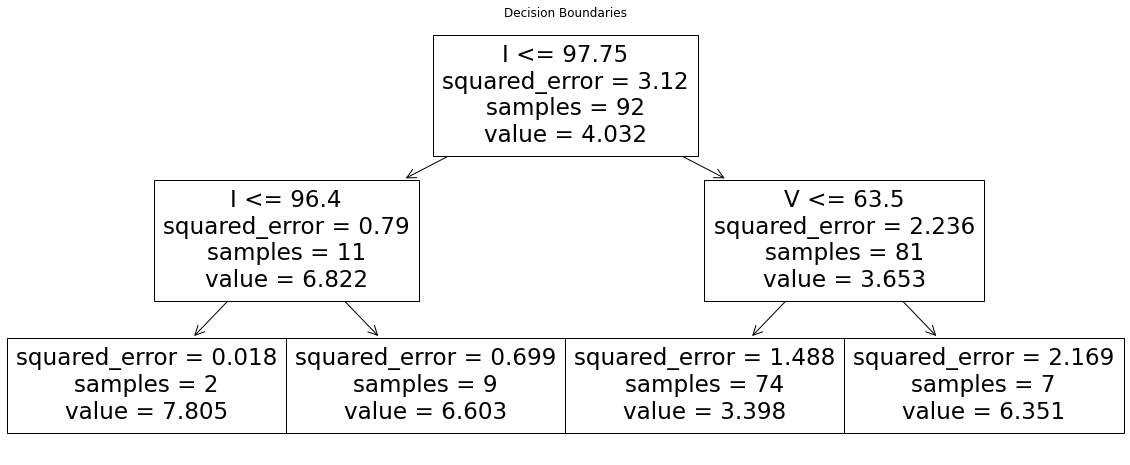

In [33]:
fig,ax=plt.subplots(1,figsize=(20,8))
tree.plot_tree(clf,feature_names=X.columns,ax=ax)
plt.title("Decision Boundaries")
plt.savefig("Tree.png")